Building a song recommender
------------- Dataset used: ------------- Million Songs Dataset Source: http://labrosa.ee.columbia.edu/millionsong/ Paper: http://ismir2011.ismir.net/papers/OS6-1.pdf The current notebook uses a subset of the above data containing 10,000 songs

In [1]:
import numpy as np
import pandas as pd

Load music data

In [2]:
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'

In [3]:
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [4]:
song_df_1 = pd.read_csv(triplets_file, header=None, sep = "\t")

In [5]:
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

In [6]:
print(song_df_1)

                                          user_id  ... listen_count
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            2
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  ...            1
...                                           ...  ...          ...
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            2
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            4
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            3
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            1
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  ...            1

[2000000 rows x 3 columns]


In [7]:
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [8]:
song_df_2 =  pd.read_csv(songs_metadata_file)


Explore data

In [9]:
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")

Music data shows how many times a user listened to a song, as well as the details of the song.

In [10]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [11]:
len(song_df)

2000000

In [12]:
users = song_df['user_id'].unique()

In [13]:

len(users)

76353

Create a subset of the dataset

In [14]:
song_df = song_df.head(10000)

Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
sns.set_style('dark')

In [17]:
song_df.groupby('title')['listen_count'].mean().sort_values(ascending=False).head(10)

title
Waiting For A Dream                      247.0
Times                                    140.0
I C Love Affair                           77.0
El Cuatrero                               74.0
How Am I Supposed To Live Without You     69.0
We Have A Map Of The Piano                62.0
Quutamo                                   60.0
Salt Water Sound                          45.0
3 Rounds and a Sound                      41.0
The Killing Moon                          40.0
Name: listen_count, dtype: float64

In [18]:
listen_counts=pd.DataFrame(song_df.groupby('title')['listen_count'].mean())

In [19]:
listen_counts.head()

,listen_count
title,
#40,1.000000
& Down,5.000000
'97 Bonnie & Clyde,1.000000
'Round Midnight,1.000000
'Till I Collapse,7.333333


In [20]:
listen_counts['listen_count_numbers'] = pd.DataFrame(song_df.groupby('title')['listen_count'].count())

In [21]:
listen_counts.head()

,listen_count,listen_count_numbers
title,,
#40,1.000000,1
& Down,5.000000,4
'97 Bonnie & Clyde,1.000000,2
'Round Midnight,1.000000,3
'Till I Collapse,7.333333,6


In [22]:
song_df.describe()

,listen_count,year
count,10000.000000,10000.000000
mean,2.991100,1662.383300
std,5.915177,751.095133
min,1.000000,0.000000
25%,1.000000,1988.000000
50%,1.000000,2003.000000
75%,3.000000,2007.000000
max,247.000000,2010.000000


In [23]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       10000 non-null  object
 1   song_id       10000 non-null  object
 2   listen_count  10000 non-null  int64 
 3   title         10000 non-null  object
 4   release       10000 non-null  object
 5   artist_name   10000 non-null  object
 6   year          10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 625.0+ KB


In [24]:
song_df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

In [25]:
song_df.corr()

,listen_count,year
listen_count,1.000000,-0.017674
year,-0.017674,1.000000


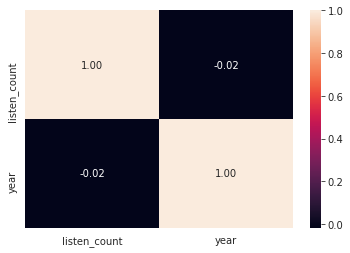

In [26]:
sns.heatmap(song_df.corr(), annot=True, fmt='.2f')

user_id = users[5]



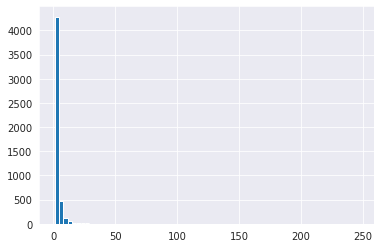

In [27]:
listen_counts['listen_count'].hist(bins=70)


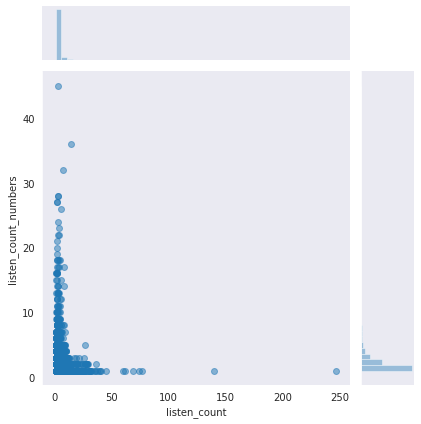

In [28]:
sns.jointplot(x='listen_count', y='listen_count_numbers', data=listen_counts, alpha=0.5)

In [29]:
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

In [30]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()

In [31]:
grouped_sum = song_grouped['listen_count'].sum()

In [32]:
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100

In [33]:
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [34]:
songs = song_df['song'].unique()
len(songs)

5151

Building the Models-Popularity based and Similarity based

In [35]:
#train and testing
from sklearn.model_selection import train_test_split

In [36]:
train_data, test_data = train_test_split(song_df, test_size = 0.50, random_state=0)

In [37]:
print(train_data.head(5))

                                       user_id  ...                                         song
333   d6589314c0a9bcbca4fee0c93b14bc402363afea  ...       Ghosts and Roses - Stephane Pompougnac
6391  7dd192c8bd4f27f573cb15e8656442aadd7a9c01  ...                 Black Hole Sun - Soundgarden
4786  85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b  ...            Una Música Brutal - Gotan Project
357   5a905f000fc1ff3df7ca807d57edb608863db05d  ...                        Tchaparian - Hot Chip
9854  b4e93ce145d511946e444cbd22c090b78735c99f  ...  Jamaica Roots II(Agora E Sempre) - Natiruts

[5 rows x 8 columns]


In [38]:

from google.colab import files
src = list(files.upload().values())[0]
open('reco2.py','wb').write(src)
import reco2

Saving reco2_py.py to reco2_py.py


In [39]:
import reco2 as Recommenders

In [40]:
pm = Recommenders.popularity_recommender_py()

In [41]:
pm.create(train_data, 'user_id', 'song')

In [42]:
user_id = users[5]

pm.recommend(user_id)

,user_id,song,score,Rank
2352,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,22,1.0
2999,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,19,2.0
3268,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,16,3.0
665,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,15,4.0
1716,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Marry Me - Train,14,5.0
1958,4bd88bfb25263a75bbdd467e74018f4ae570e5df,OMG - Usher featuring will.i.am,14,6.0
2237,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,14,7.0
863,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,13,8.0
1150,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,13,9.0
3017,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,12,10.0


In [43]:
is_model = Recommenders.item_similarity_recommender_py()

In [44]:
is_model.create(train_data, 'user_id', 'song')

In [45]:
user_id = users[9]

user_items = is_model.get_user_items(user_id)

for user_item in user_items:

   print(user_item)

Electric Feel - MGMT
I'm Back - Eminem
Let There Be Light (album version) - Justice
Burnin' (Edit version) - Daft Punk
Steam Machine - Daft Punk
Technologic - Daft Punk
The Righteous And The Wicked (Album Version) - Red Hot Chili Peppers
No Sleep Till Brooklyn - The Beastie Boys
It's Tricky - RUN-DMC
Rock'n Roll - Daft Punk
Da Funk - Daft Punk
Robot Rock - Daft Punk
Amityville - Eminem / Bizarre
Aerodynamic - Daft Punk
Voyager - Daft Punk
Superhereos - Daft Punk
Too Long - Daft Punk
Never Let You Go - Justin Bieber
Digital Love - Daft Punk
Meanwhile_ Rick James... - Cake
Television Rules The Nation - Daft Punk
Too Shy - Kajagoogoo
Jumping Jack Flash - The Rolling Stones
Breaking The Girl (Album Version) - Red Hot Chili Peppers
Human After All - Daft Punk
Something About Us - Daft Punk
High Life - Daft Punk


In [46]:
pm.create(train_data, 'user_id', 'song')

In [47]:
user_id = users[9]

In [48]:
pm.recommend(user_id)

,user_id,song,score,Rank
2352,b64cdd1a0bd907e5e00b39e345194768e330d652,Sehr kosmisch - Harmonia,22,1.0
2999,b64cdd1a0bd907e5e00b39e345194768e330d652,Undo - Björk,19,2.0
3268,b64cdd1a0bd907e5e00b39e345194768e330d652,You're The One - Dwight Yoakam,16,3.0
665,b64cdd1a0bd907e5e00b39e345194768e330d652,Dog Days Are Over (Radio Edit) - Florence + Th...,15,4.0
1716,b64cdd1a0bd907e5e00b39e345194768e330d652,Marry Me - Train,14,5.0
1958,b64cdd1a0bd907e5e00b39e345194768e330d652,OMG - Usher featuring will.i.am,14,6.0
2237,b64cdd1a0bd907e5e00b39e345194768e330d652,Revelry - Kings Of Leon,14,7.0
863,b64cdd1a0bd907e5e00b39e345194768e330d652,Fireflies - Charttraxx Karaoke,13,8.0
1150,b64cdd1a0bd907e5e00b39e345194768e330d652,Hey_ Soul Sister - Train,13,9.0
3017,b64cdd1a0bd907e5e00b39e345194768e330d652,Use Somebody - Kings Of Leon,12,10.0


In [49]:
is_model = Recommenders.item_similarity_recommender_py()

is_model.create(train_data, 'user_id', 'song')
user_id = users[9]

user_items = is_model.get_user_items(user_id)

for user_item in user_items:
     print(user_item)

Electric Feel - MGMT
I'm Back - Eminem
Let There Be Light (album version) - Justice
Burnin' (Edit version) - Daft Punk
Steam Machine - Daft Punk
Technologic - Daft Punk
The Righteous And The Wicked (Album Version) - Red Hot Chili Peppers
No Sleep Till Brooklyn - The Beastie Boys
It's Tricky - RUN-DMC
Rock'n Roll - Daft Punk
Da Funk - Daft Punk
Robot Rock - Daft Punk
Amityville - Eminem / Bizarre
Aerodynamic - Daft Punk
Voyager - Daft Punk
Superhereos - Daft Punk
Too Long - Daft Punk
Never Let You Go - Justin Bieber
Digital Love - Daft Punk
Meanwhile_ Rick James... - Cake
Television Rules The Nation - Daft Punk
Too Shy - Kajagoogoo
Jumping Jack Flash - The Rolling Stones
Breaking The Girl (Album Version) - Red Hot Chili Peppers
Human After All - Daft Punk
Something About Us - Daft Punk
High Life - Daft Punk


In [50]:
is_model.create(train_data, 'user_id', 'song')

In [51]:
user_id = users[5]
user_items = is_model.get_user_items(user_id)

for user_item in user_items:
  print(user_item)
pm.recommend(user_id)

Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai


,user_id,song,score,Rank
2352,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,22,1.0
2999,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,19,2.0
3268,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,16,3.0
665,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,15,4.0
1716,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Marry Me - Train,14,5.0
1958,4bd88bfb25263a75bbdd467e74018f4ae570e5df,OMG - Usher featuring will.i.am,14,6.0
2237,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,14,7.0
863,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,13,8.0
1150,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,13,9.0
3017,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,12,10.0


In [53]:
song = 'Yellow – Coldplay'

is_model.get_similar_items([song])

no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Cover My Eyes - La Roux,0.0,1
1,,The Carpal Tunnel Of Love - Fall Out Boy,0.0,2
2,,The Whole World - Outkast Featuring Killer Mike,0.0,3
3,,Go With The Flow - Queens Of The Stone Age,0.0,4
4,,These Days - The Black Keys,0.0,5
5,,She Just Likes To Fight - Four Tet,0.0,6
6,,Mourning Air - Portishead,0.0,7
7,,Break Through - Colbie Caillat,0.0,8
8,,Creepin Up The Backstairs - The Fratellis,0.0,9
9,,Warning Sign - Coldplay,0.0,10


In [54]:

from google.colab import files
src = list(files.upload().values())[0]
open('Evaluation.py','wb').write(src)
import Evaluation

Saving evaluation.py to evaluation.py


Quantitative comparison between the models

In [65]:
import Evaluation as Evaluation
import time
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [57]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:352
Length of user sample:17
Getting recommendations for user:1764b2ebb09e2a40e11ed82f9c37a53a706cc4e1
No. of unique songs for the user: 9
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :258
Getting recommendations for user:3851d01aa9d1b2505fa361b63940e8cdc9a3e754
No. of unique songs for the user: 14
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :1209
Getting recommendations for user:1b704d4cddabea8258bd93497fcb73eab32fa592
No. of unique songs for the user: 71
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :6306
Getting recommendations for user:d305e8d98cf77ce3b90c69580dd3fc38e86fee93
No. of unique songs for the user: 7
no. of unique songs in the training set: 3302
Non zero values in cooccurence_matrix :152
Getting recommendations for user:b64cdd1a0bd907e5e00b39e345194768e330d652
No. of unique songs for the user: 27
no. of unique songs in the 


Code to plot precision recall curve

In [59]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


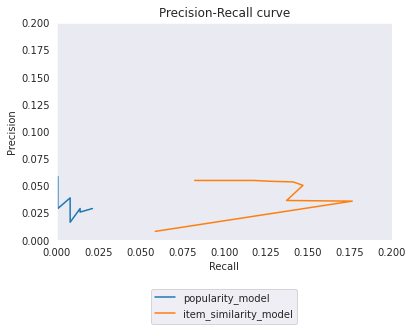

In [60]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")